In [127]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib
from joblib import load
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np

# Step 1: Load cleaned and normalized dataset
df_model = pd.read_csv('/Users/sa25/Desktop/music-rec-algorithm-TLAB/data/cleaned_dataset.csv')

Model Training

In [128]:
# Step 2: Select the same features standardized earlier
features = df_model.select_dtypes(include=['float64', 'int64'])

# Step 3: Identify skewed columns
skewed_cols = []
for col in features:
    if (df_model[col] > 0).all(): 
        if skew(df_model[col]) > 1:
            skewed_cols.append(col)

print("Skewed columns to transform:", skewed_cols)

Skewed columns to transform: ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'sadness', 'feelings']


In [129]:
# Step 4: Apply log transformation to skewed columns
for col in skewed_cols:
    df_model[f'{col}_log'] = np.log1p(df_model[col])

In [130]:
# Step 5: Dimentionality Reduction by PCA
pca = PCA(n_components=3) 
features_pca = pca.fit_transform(features)

# Step 6: Train KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

# Step 7: Assign cluster labels to the original dataframe
df_model['cluster'] = kmeans.labels_

# Step 8: Save updated dataframe
df_model.to_csv('clustered_dataset.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'clustered_dataset.csv'

In [85]:
# load raw data set, and combine with cleaned_df dataset (with the additional 'Cluster' column)
df = pd.read_csv("/Users/sa25/Desktop/music-rec-algorithm-TLAB/data/train.csv")

label = df[['genre', 'artist_name', 'track_name', 'release_date']]

label = pd.concat([label, df_model], axis=1)

label.head()

,genre,artist_name,track_name,release_date,release_date,len,dating,violence,world/life,night/time,...,romantic_log,communication_log,obscene_log,music_log,movement/places_log,light/visual perceptions_log,family/spiritual_log,sadness_log,feelings_log,cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,1950,95,0.000598,0.063746,0.000598,0.000598,...,0.016960,0.234084,0.000598,0.038536,0.000598,0.000598,0.000598,0.322300,0.110804,1
1,pop,frankie laine,i believe,1950,1950,51,0.035537,0.096777,0.443435,0.001284,...,0.001283,0.001283,0.001283,0.111572,0.001283,0.192834,0.049860,0.001283,0.001283,0
2,pop,johnnie ray,cry,1950,1950,24,0.002770,0.002770,0.002770,0.002770,...,0.147182,0.223678,0.002766,0.280502,0.002766,0.002766,0.002766,0.002766,0.203286,0
3,pop,pérez prado,patricia,1950,1950,54,0.048249,0.001548,0.001548,0.001548,...,0.344678,0.001547,0.001547,0.001547,0.121554,0.001547,0.001547,0.203667,0.001547,0
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,1950,48,0.001350,0.001350,0.417772,0.001350,...,0.380783,0.001349,0.001349,0.001349,0.001349,0.001349,0.029320,0.066537,0.001349,0


In [86]:
# Get value count for each cluster
df_model['cluster'].value_counts().sort_index().to_frame(name='Count')

,Count
cluster,
0,8614
1,8668
2,7481
3,3599


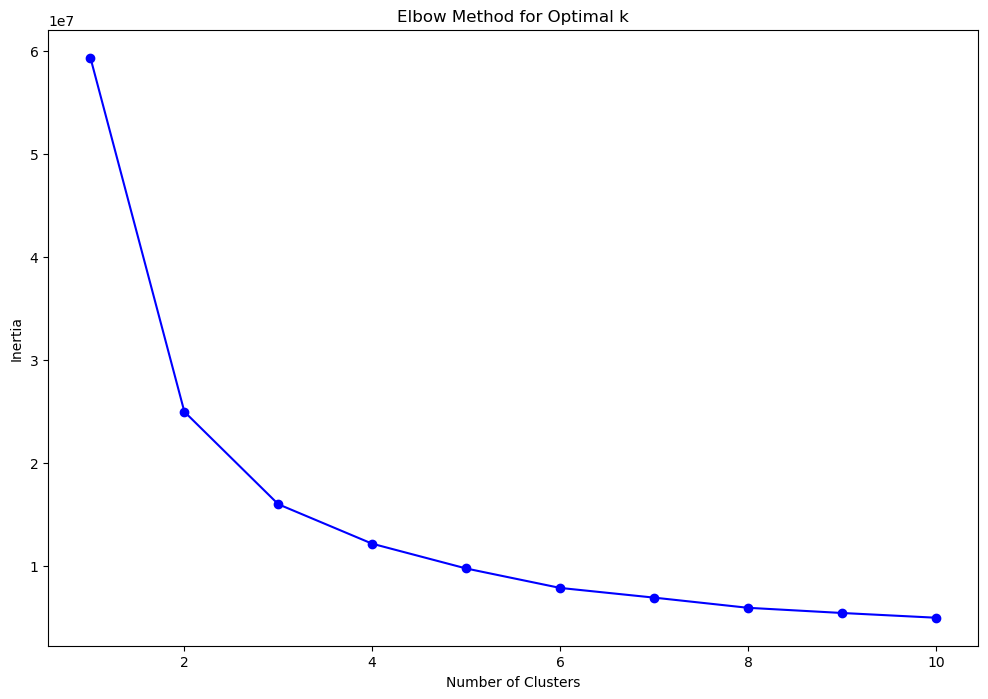

In [87]:
# Step 9: Visualize elbow method to determine best # of clusters
inertia = []
k_range = range(1, 11)
for i in k_range:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(features)
    inertia.append(km.inertia_)
    
plt.figure(figsize=(12, 8))
plt.plot(k_range, inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [88]:
# Step 10: Silhouette Score to determine clustering quality
best_score = -1
best_k = 0
for k in k_range[1:11]:  # Start from 2 to avoid singularity
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    print(f"Silhouette Score for {k} clusters: {score}")
    
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best # of clusters based on Silhouette Score is: {best_k}")

Silhouette Score for 2 clusters: 0.5261716006338516
Silhouette Score for 3 clusters: 0.40642000461089384
Silhouette Score for 4 clusters: 0.3801647642164433
Silhouette Score for 5 clusters: 0.36239670657926143
Silhouette Score for 6 clusters: 0.3766455554290103
Silhouette Score for 7 clusters: 0.3560677606343255
Silhouette Score for 8 clusters: 0.35891586943297155
Silhouette Score for 9 clusters: 0.3440027671321802
Silhouette Score for 10 clusters: 0.33824775513965954
Best # of clusters based on Silhouette Score is: 2


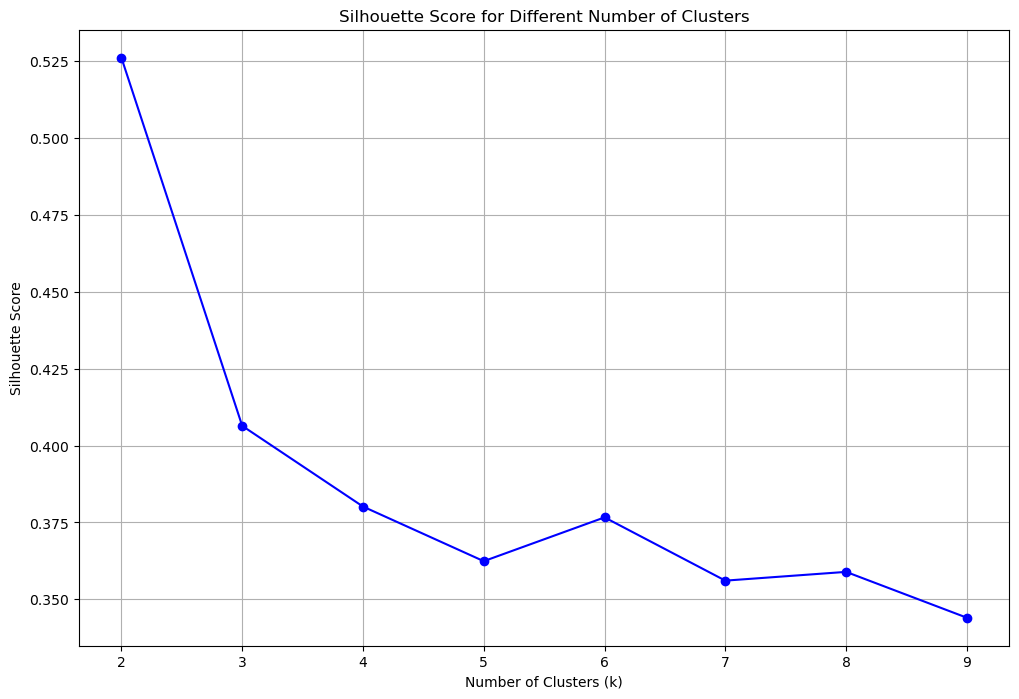

In [89]:
# Initialize list to store silhouette scores
sil_scores = []

# Test different cluster values
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)  # Get cluster labels for each data point
    
    # Calculate silhouette score for the current number of clusters
    score = silhouette_score(features, cluster_labels)
    sil_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(12, 8))
plt.plot(range(2, 10), sil_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10)) 
plt.grid(True)
plt.show()


In [90]:
# Save cluster labels to dataset
kmeans = KMeans(n_clusters=3, random_state=42)
df_model['cluster'] = kmeans.fit_predict(features)

# Save updated dataframe with cluster labels
df_model.to_csv('clustered_training_dataset.csv', index=False)

In [91]:
# Predict the cluster labels using the trained KMeans model
df_model['cluster'] = kmeans.predict(features)  # Predicting the clusters for test data

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.joblib')

# Save the updated training dataframe with predicted cluster labels
df_model.to_csv('clustered_training_dataset.csv', index=False)


Testing

In [92]:
# Load the test dataset
df_recommend = pd.read_csv('/Users/sa25/Desktop/music-rec-algorithm-TLAB/data/recommend.csv')

# Step 2: Check the first few rows to understand the data
print(df_recommend.head())

   Unnamed: 0       artist_name           track_name  release_date   genre  \
0       76885          godsmack               immune          1998    rock   
1       65394      dennis brown        second chance          1993  reggae   
2       10980  the black crowes          sister luck          1990     pop   
3         842   jerry lee lewis  your cheating heart          1960     pop   
4        2764         paul anka             eso beso          1966     pop   

                                              lyrics  len    dating  violence  \
0  come world society futher place home land deat...   74  0.000907  0.348191   
1  maybe maybe treat good feel second best girl s...   43  0.001224  0.029943   
2  worry sick eye hurt rest head life outside gir...   54  0.001120  0.482490   
3  cheat heart weep sleep sleep come night cheat ...   25  0.204740  0.002506   
4  beso kiss beso kiss know samba bossanova close...   97  0.001170  0.001170   

   world/life  ...   obscene     music  move

In [122]:
# Select same features for clustering as used in training
df_recommend = df_model.select_dtypes(include=['float64', 'int64']).columns

# Load models and feature list from training
scaler = joblib.load('/Users/sa25/Desktop/music-rec-algorithm-TLAB/data/scaler_model.joblib')
kmeans = joblib.load('/Users/sa25/Desktop/music-rec-algorithm-TLAB/data/kmeans_model.joblib')
numeric_cols = joblib.load('/Users/sa25/Desktop/music-rec-algorithm-TLAB/data/numeric_cols.joblib')

# Select numeric columns from the dataset, using the saved feature list
df_recommend = df_model[numeric_cols].copy()

# Scale and predict
df_recommend_scaled = pd.DataFrame(scaler.transform(df_recommend), columns=numeric_cols)
df_recommend['cluster'] = kmeans.predict(df_recommend_scaled)

# Save output
df_recommend.to_csv('/Users/sa25/Desktop/music-rec-algorithm-TLAB/data/clustered_recommend_dataset.csv', index=False)

Analyze Clusters

In [112]:
# Group by cluster and get means of each feature
df_model.groupby('cluster').mean()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,...,family/gospel_log,romantic_log,communication_log,obscene_log,music_log,movement/places_log,light/visual perceptions_log,family/spiritual_log,sadness_log,feelings_log
cluster,,,,,,,,,,,,,,,,,,,,,
0,1983.978908,41.304760,0.022261,0.099881,0.138047,0.061523,0.013828,0.016962,0.066503,0.081235,...,0.015992,0.058460,0.072570,0.039508,0.061068,0.032914,0.047145,0.022512,0.131216,0.030087
1,1998.718679,155.387548,0.018773,0.118753,0.080069,0.040498,0.025145,0.016640,0.018827,0.064707,...,0.015923,0.017365,0.059616,0.231982,0.035051,0.060396,0.033700,0.022117,0.047234,0.025030
2,1995.483402,84.688829,0.020440,0.143194,0.113434,0.058111,0.019341,0.017311,0.035904,0.074983,...,0.016413,0.032464,0.068071,0.080413,0.047867,0.049840,0.045300,0.023309,0.105639,0.027605


In [142]:
# Same for test dataset
df_recommend.groupby('cluster').mean()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,feelings_outlier
cluster,,,,,,,,,,,,,,,,,,
0,1990.239652,73.030534,0.02111,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.110712


In [96]:
df_model[numeric_cols].describe()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,feelings_outlier
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.110712
std,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.313780
min,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.000000
25%,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.000000
50%,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.000000
75%,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.000000
max,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


In [97]:
df_recommend[numeric_cols].describe()


,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1982.40000,67.100000,0.026539,0.189975,0.090456,0.145882,0.028714,0.018003,0.063393,0.159464,0.047239,0.003140,0.001292,0.040348,0.011263,0.094660,0.034098
std,19.12648,37.910567,0.064616,0.242146,0.119021,0.165350,0.070074,0.035532,0.169317,0.185671,0.145081,0.005733,0.000536,0.099356,0.024406,0.166585,0.062518
min,1952.00000,25.000000,0.000675,0.000675,0.001120,0.000907,0.000675,0.000675,0.000711,0.000907,0.000711,0.000675,0.000675,0.000675,0.000711,0.000675,0.000675
25%,1967.00000,41.500000,0.000961,0.001539,0.001329,0.013669,0.001183,0.001046,0.001205,0.001504,0.001132,0.001132,0.000961,0.000987,0.001132,0.001183,0.001539
50%,1988.00000,55.500000,0.001197,0.016225,0.058601,0.091202,0.001483,0.001574,0.001574,0.070768,0.001343,0.001343,0.001197,0.001483,0.001364,0.001483,0.008767
75%,1996.75000,86.750000,0.001493,0.448915,0.133570,0.252819,0.011667,0.018274,0.010369,0.300762,0.001609,0.001609,0.001493,0.002291,0.002291,0.097057,0.030697
max,2009.00000,152.000000,0.204740,0.543658,0.375448,0.492312,0.225414,0.113651,0.541449,0.460564,0.460145,0.019389,0.002506,0.314626,0.077630,0.474607,0.202862


In [141]:
pd.set_option('display.max_columns', None)
label[df_recommend['cluster'] == 0].sample(15)

,genre,artist_name,track_name,release_date,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,genre_blues,genre_country,genre_hip hop,genre_jazz,genre_pop,genre_reggae,genre_rock,topic_feelings,topic_music,topic_night/time,topic_obscene,topic_romantic,topic_sadness,topic_violence,topic_world/life,feelings_outlier,len_log,dating_log,violence_log,world/life_log,night/time_log,shake the audience_log,family/gospel_log,romantic_log,communication_log,obscene_log,music_log,movement/places_log,light/visual perceptions_log,family/spiritual_log,sadness_log,feelings_log,cluster
18373,jazz,jean carn,don't let it go to your head,1978,1978,67,0.000907,0.497478,0.000907,0.000907,0.000907,0.000907,0.000907,0.139960,0.000907,0.000907,0.000907,0.000907,0.000907,0.257962,0.042706,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,0,4.219508,0.000907,0.403782,0.000907,0.000907,0.000907,0.000907,0.000907,0.130993,0.000907,0.000907,0.000907,0.000907,0.000907,0.229493,0.041819,0
2680,pop,abba,under attack,1981,1981,126,0.049221,0.133889,0.000543,0.000543,0.000543,0.000543,0.047239,0.291652,0.000543,0.000543,0.000543,0.000543,0.000543,0.306463,0.046439,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,0,4.844187,0.048048,0.125654,0.000542,0.000542,0.000542,0.000542,0.046157,0.255922,0.000542,0.000542,0.000542,0.000542,0.000542,0.267323,0.045393,3
825,pop,the supremes,where did our love go,1964,1964,56,0.410892,0.001032,0.001032,0.001032,0.001032,0.001032,0.001032,0.001032,0.001032,0.001032,0.001032,0.088351,0.001032,0.332105,0.001032,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,0,4.043051,0.344222,0.001031,0.001031,0.001031,0.001031,0.001031,0.001031,0.001031,0.001031,0.001031,0.001031,0.084664,0.001031,0.286760,0.001031,0
10482,country,cory morrow,the man that i've been,1993,1993,89,0.000711,0.103858,0.452540,0.046363,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.140478,0.000711,0.000711,0.000711,0.130708,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,1,4.499810,0.000711,0.098812,0.373314,0.045320,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.131447,0.000711,0.000711,0.000711,0.122844,1
25189,rock,nine inch nails,head like a hole,1989,1989,35,0.001754,0.325430,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.265685,0.001754,0.001754,0.001754,0.001754,0.087255,0.063533,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,3.583519,0.001753,0.281737,0.001753,0.001753,0.001753,0.001753,0.001753,0.001753,0.235614,0.001753,0.001753,0.001753,0.001753,0.083657,0.061597,2
17782,jazz,frank zappa,anyway the wind blows,1966,1966,43,0.026899,0.001253,0.143866,0.001253,0.038475,0.001253,0.001253,0.255699,0.001253,0.031376,0.001253,0.022633,0.001253,0.313033,0.001253,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,0,3.784190,0.026543,0.001252,0.134414,0.001252,0.037753,0.001252,0.001252,0.227692,0.001252,0.030894,0.001252,0.022381,0.001252,0.272340,0.001252,0
12094,country,whiskey myers,colloquy,2014,2014,65,0.000993,0.000993,0.130249,0.000993,0.000993,0.000993,0.059192,0.304176,0.029410,0.000993,0.000993,0.000993,0.040012,0.396453,0.000993,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0,4.189655,0.000993,0.000993,0.122438,0.000993,0.000993,0.000993,0.057507,0.265572,0.028986,0.000993,0.000993,0.000993,0.039232,0.333936,0.000993,2
12858,blues,muddy waters,i feel so good,1960,1960,43,0.151803,0.036591,0.001253,0.001253,0.026173,0.001253,0.001253,0.077069,0.072516,0.066565,0.001253,0.001253,0.001253,0.001253,0.450307,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,1,3.784190,0.1413

In [133]:
df_model.groupby('cluster').count()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,...,family/gospel_log,romantic_log,communication_log,obscene_log,music_log,movement/places_log,light/visual perceptions_log,family/spiritual_log,sadness_log,feelings_log
cluster,,,,,,,,,,,,,,,,,,,,,
0,8614,8614,8614,8614,8614,8614,8614,8614,8614,8614,...,8614,8614,8614,8614,8614,8614,8614,8614,8614,8614
1,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,...,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668
2,7481,7481,7481,7481,7481,7481,7481,7481,7481,7481,...,7481,7481,7481,7481,7481,7481,7481,7481,7481,7481
3,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,...,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599


In [99]:
label[df_model['cluster'] == 0].sample(10)

,genre,artist_name,track_name,release_date,release_date,len,dating,violence,world/life,night/time,...,romantic_log,communication_log,obscene_log,music_log,movement/places_log,light/visual perceptions_log,family/spiritual_log,sadness_log,feelings_log,cluster
1124,pop,the beach boys,with me tonight,1967,1967,35,0.002193,0.002193,0.002193,0.559834,...,0.002191,0.302335,0.002191,0.002191,0.002191,0.002191,0.002191,0.002191,0.050754,0
3957,pop,the lemonheads,it's a shame about ray,1992,1992,32,0.001880,0.001880,0.381744,0.001880,...,0.001878,0.001878,0.001878,0.001878,0.189758,0.001878,0.001878,0.245979,0.097336,2
26994,rock,seether,nobody praying for me,2014,2014,38,0.001698,0.392021,0.001698,0.001698,...,0.058620,0.001696,0.080919,0.001696,0.001696,0.090500,0.001696,0.171869,0.001696,2
669,pop,lesley gore,time to go,1963,1963,36,0.001422,0.001422,0.001422,0.130085,...,0.150889,0.270231,0.001421,0.001421,0.001421,0.001421,0.028261,0.298772,0.001421,0
11602,country,alan jackson,when we all get to heaven,2006,2006,28,0.002924,0.002924,0.002924,0.002924,...,0.002920,0.002920,0.002920,0.335993,0.002920,0.308075,0.176541,0.002920,0.002920,2
17255,jazz,dean martin,carolina moon,1954,1954,42,0.001548,0.001548,0.001548,0.337552,...,0.001547,0.089751,0.001547,0.131680,0.001547,0.339741,0.001547,0.001547,0.001547,0
20838,jazz,riley richard,l.i.t.,2018,2018,30,0.026316,0.026316,0.026316,0.026316,...,0.025975,0.025975,0.025975,0.422857,0.025975,0.025975,0.025975,0.025975,0.025975,2
25410,rock,megadeth,this was my life,1992,1992,58,0.001548,0.317281,0.264790,0.001548,...,0.001547,0.221981,0.136419,0.001547,0.001547,0.001547,0.001547,0.001547,0.001547,2
1015,pop,the seeds,it's a hard life,1966,1966,50,0.030108,0.001350,0.317152,0.001350,...,0.001349,0.001349,0.001349,0.001349,0.262753,0.001349,0.001349,0.001349,0.001349,0
25225,rock,judas priest,hell patrol,1990,1990,59,0.001880,0.612491,0.001880,0.001880,...,0.001878,0.001878,0.001878,0.001878,0.115928,0.167325,0.001878,0.001878,0.052839,2


In [100]:
label[df_model['cluster'] == 1].sample(10)

,genre,artist_name,track_name,release_date,release_date,len,dating,violence,world/life,night/time,...,romantic_log,communication_log,obscene_log,music_log,movement/places_log,light/visual perceptions_log,family/spiritual_log,sadness_log,feelings_log,cluster
26508,rock,hollywood undead,california,2008,2008,179,0.000487,0.000487,0.000487,0.079963,...,0.000487,0.000487,0.497877,0.000487,0.200115,0.000487,0.000487,0.000487,0.000487,3
12445,country,mason ramsey,puddle of love,2019,2019,127,0.000566,0.000566,0.000566,0.000566,...,0.000566,0.000566,0.357712,0.040924,0.197979,0.000566,0.000566,0.015151,0.000566,3
5945,pop,nicki minaj,did it on’em,2010,2010,190,0.000458,0.000458,0.000458,0.000458,...,0.000458,0.043082,0.591039,0.000458,0.000458,0.000458,0.059377,0.000458,0.000458,3
20384,jazz,esperanza spalding,black gold,2012,2012,141,0.047993,0.468870,0.065360,0.000454,...,0.032993,0.077709,0.000454,0.000454,0.000454,0.232470,0.000454,0.000454,0.000454,3
21088,reggae,augustus pablo,jah work,1973,1973,176,0.000591,0.000591,0.201671,0.000591,...,0.022695,0.000591,0.505016,0.000591,0.000591,0.000591,0.016326,0.000591,0.000591,3
4100,pop,counting crows,a murder of one,1993,1993,189,0.032714,0.000304,0.455781,0.000304,...,0.029658,0.063659,0.000304,0.025801,0.092811,0.189141,0.000304,0.000304,0.000304,3
23092,reggae,chronixx,alpha & omega,2014,2014,150,0.000786,0.331911,0.178468,0.000786,...,0.000785,0.063702,0.000785,0.000785,0.000785,0.170389,0.117491,0.000785,0.000785,3
4265,pop,raekwon,criminology,1995,1995,174,0.000497,0.127273,0.000497,0.013245,...,0.000496,0.000496,0.506269,0.000496,0.081195,0.020452,0.042268,0.000496,0.000496,3
23799,rock,the velvet underground,white light/white heat,1968,1968,157,0.000399,0.374160,0.000399,0.000399,...,0.000399,0.040572,0.018997,0.000399,0.054793,0.320737,0.000399,0.000399,0.000399,3
5381,pop,mike jones,flossin' (feat. big moe),2005,2005,163,0.000810,0.000810,0.000810,0.000810,...,0.000809,0.000809,0.331391,0.000809,0.330075,0.000809,0.052019,0.103058,0.000809,3


In [101]:
label[df_model['cluster'] == 2].sample(10)

,genre,artist_name,track_name,release_date,release_date,len,dating,violence,world/life,night/time,...,romantic_log,communication_log,obscene_log,music_log,movement/places_log,light/visual perceptions_log,family/spiritual_log,sadness_log,feelings_log,cluster
23896,rock,the who,the song is over,1971,1971,102,0.000612,0.000612,0.000612,0.000612,...,0.000612,0.000612,0.000612,0.363030,0.000612,0.143978,0.107155,0.220111,0.000612,1
2092,pop,donna summer,autumn changes,1976,1976,69,0.001350,0.001350,0.526353,0.001350,...,0.001349,0.136605,0.001349,0.001349,0.001349,0.001349,0.001349,0.152713,0.059509,0
2428,pop,the boomtown rats,someone's looking at you,1979,1979,100,0.000752,0.374422,0.000752,0.089883,...,0.055557,0.168885,0.000752,0.027434,0.065147,0.000752,0.000752,0.000752,0.000752,1
11912,country,big & rich,fake id (feat. gretchen wilson),2011,2011,101,0.000721,0.111563,0.026322,0.000721,...,0.000721,0.000721,0.497326,0.000721,0.070685,0.000721,0.000721,0.000721,0.000721,1
2115,pop,the modern lovers,hospital,1976,1976,91,0.000711,0.332134,0.123882,0.040573,...,0.000711,0.103375,0.000711,0.000711,0.000711,0.136288,0.000711,0.082638,0.000711,1
14355,blues,the fall,the man whose head expanded,1983,1983,99,0.001012,0.666639,0.001012,0.001012,...,0.001012,0.064414,0.043625,0.001012,0.001012,0.001012,0.001012,0.077382,0.001012,1
9019,country,kenny rogers,making music for money,1978,1978,91,0.000627,0.000627,0.000627,0.000627,...,0.000626,0.216477,0.285998,0.219432,0.053062,0.000626,0.022437,0.000626,0.022953,1
13513,blues,foghat,maybelline,1972,1972,80,0.001053,0.001053,0.001053,0.001053,...,0.095827,0.238330,0.323044,0.001052,0.141041,0.001052,0.001052,0.001052,0.001052,1
2116,pop,the modern lovers,astral plane,1976,1976,67,0.001316,0.257871,0.170758,0.312883,...,0.001315,0.101535,0.001315,0.001315,0.001315,0.054231,0.001315,0.001315,0.001315,0
5335,pop,common,go!,2005,2005,102,0.026175,0.000835,0.312862,0.000835,...,0.000835,0.071515,0.192808,0.000835,0.000835,0.000835,0.016946,0.000835,0.000835,1


In [102]:
from sklearn.manifold import TSNE

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
tsne_components = tsne.fit_transform(df_recommend_scaled)

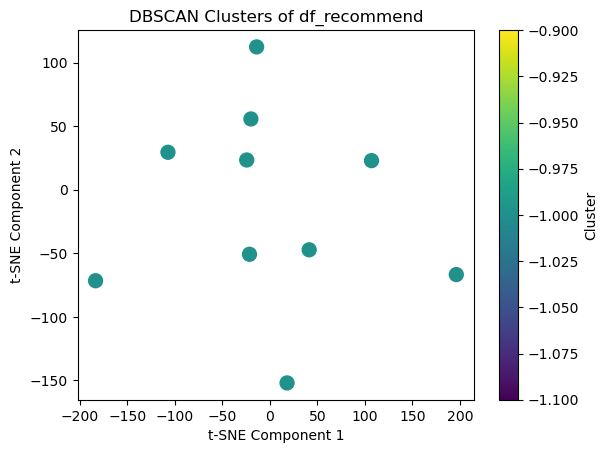

In [103]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN to df_recommend_scaled
dbscan = DBSCAN(eps=0.5, min_samples=3)
df_recommend['cluster'] = dbscan.fit_predict(df_recommend_scaled)

# Visualize DBSCAN clusters
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=df_recommend['cluster'], cmap='viridis', s=100)
plt.title('DBSCAN Clusters of df_recommend')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

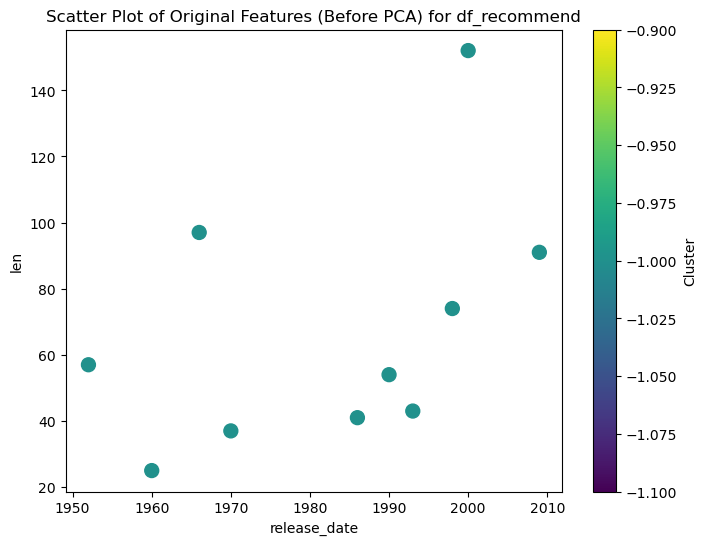

In [104]:
feature1 = df_recommend[numeric_cols[0]]
feature2 = df_recommend[numeric_cols[1]]

# Scatter plot of the two features
plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, c=df_recommend['cluster'], cmap='viridis', s=100)
plt.title('Scatter Plot of Original Features (Before PCA) for df_recommend')
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.colorbar(label='Cluster')
plt.show()

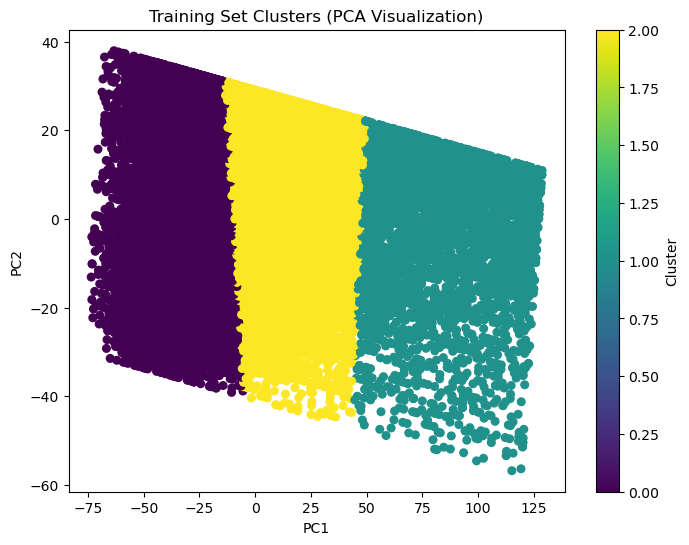

In [105]:
# Reduce to 2D for visualization
pca = PCA(n_components=3)
components = pca.fit_transform(df_model[numeric_cols])

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=df_model['cluster'], cmap='viridis', s=30)
plt.title('Training Set Clusters (PCA Visualization)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()
